## Project:  NYC Payroll 

### Name: Steph Roberts

## Project Overview
In this project, we will use payroll data downloaded from NYC Open Data to explore the basics of data analysis. The focus will be on data cleaning and manipulation techniques.

## Data
The data for this project is sourced from [NYC Open Data](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e) and includes information on NYC employees’ salary and overtime pay. According to the data dictionary:

Data is collected due to public interest in how the City’s budget is allocated, specifically concerning salary and overtime pay for municipal employees. This data is entered into the City's Personnel Management System (“PMS”) by the respective user Agencies. Each record represents key statistics for every city employee, including Agency, Last Name, First Name, Middle Initial, Agency Start Date, Work Location Borough, Job Title Description, Leave Status as of the close of the FY (June 30th), Base Salary, Pay Basis, Regular Hours Paid, Regular Gross Paid, Overtime Hours worked, Total Overtime Paid, and Total Other Compensation (such as lump sum and/or retro payments). The data is useful for analyzing the allocation of the City's financial resources and the portion of the budget devoted to overtime. It should be noted that any salary increments received during the fiscal year are not captured, only the employee's final base and gross salary at the fiscal year's end.

**NOTE:** As part of FISA-OPA’s process for reviewing and releasing Citywide Payroll Data, information from certain agencies (including the NYC Police Department (NYPD) and District Attorneys’ Offices in Manhattan, Kings, Queens, Richmond, Bronx, and Special Narcotics) has been redacted. These agencies are exempt from disclosure under the Freedom of Information Law, POL § 87(2)(f), as the release of such information could endanger public servants' lives and safety. Additionally, the information is exempt under POL § 87(2)(e)(iii) as it could identify confidential sources or disclose confidential information related to a criminal investigation, and under POL § 87(2)(e)(iv) as it could reveal non-routine criminal investigative techniques or procedures.

**Important:** The CSV file is large, so loading it into a DataFrame may take several minutes depending on your computer's performance. Due to the file size, you might encounter a warning about mixed data types when reading the data. To avoid this warning, specify the data type for the columns when using [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to ensure that Pandas interprets the data correctly. For more details on addressing this warning, see [this article](https://www.roelpeters.be/solved-dtypewarning-columns-have-mixed-types-specify-dtype-option-on-import-or-set-low-memory-in-pandas/).


In [109]:
# common imports
import pandas as pd
import numpy as np

In [110]:
# import data - use dtype argument due to large file size
nyc_full = pd.read_csv('NYC_Payroll_Data.csv', dtype={'Fiscal Year': 'int', 'Payroll Number': 'float', 'Agency Name': 'str',
                                                            'Last Name': 'str','First Name': 'str','Mid Init': 'str',
                                                            'Agency Start Date': 'str','Work Location Borough': 'str','Title Description': 'str',
                                                            'Leave Status as of June 30': 'str','Base Salary': 'float','Pay Basis': 'str',
                                                            'Regular Hours': 'float', 'Regular Gross Paid': 'float', 'OT Hours': 'float',
                                                            'Total OT Paid': 'float', 'Total Other Pay': 'float'})

In [111]:
# make copy of data so you do not need to import again if you make a mistake and need to "reset"
nyc = nyc_full.copy()

In [112]:
# check information about DataFrame
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496767 entries, 0 to 4496766
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int32  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int32(1), object(9)
memory usage: 566.1+ MB


In [113]:
# check first five rows of data
nyc.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


As we examine the DataFrame further, we notice that while most values are in uppercase, some are in lowercase. To ensure consistency, we'll run the following function to transform all characters to uppercase, aligning them with the majority of the data.

In [114]:
# run this code block
def upper_case(df):
    '''
    Takes as input the `nyc` DataFrame. 
    Then capitlizes each character in columns with "object" data type.
    '''
    # iterating over each column in the DataFrame
    for col in df.columns:
        # checking datatype of each column
        if df[col].dtype == 'object':
            # applying upper function on column
            df[col] = df[col].str.upper()

upper_case(nyc)

Next, let's determine the total number of rows in the full dataset.

In [115]:
# find number of rows
print(nyc.shape)
print(f'The NYC df has',len(nyc),'columns')

(4496767, 17)
The NYC df has 4496767 columns


In [116]:
# create a new df for 2021 data only
nyc21 = nyc[nyc['Fiscal Year']==2021]
nyc21.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
3923290,2021,996.0,NYC HOUSING AUTHORITY,MUSTACIUOLO,VITO,J,02/26/2018,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,258000.0,PER ANNUM,1820.0,257260.30,0.00,0.00,258000.00
3923291,2021,996.0,NYC HOUSING AUTHORITY,RUSS,GREGORY,P,08/12/2019,MANHATTAN,CHAIR,ACTIVE,414707.0,PER ANNUM,1820.0,413518.05,0.00,0.00,500.00
3923292,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,MCGROARTY,MICHAEL,NaN,10/06/2014,QUEENS,STATIONARY ENGINEER,ACTIVE,508.8,PER DAY,2080.0,132288.00,2374.75,238829.13,40105.00
3923293,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,HALLAHAN,PATRICK,M,02/26/2018,BROOKLYN,STATIONARY ENGINEER,ACTIVE,508.8,PER DAY,2080.0,132288.00,2115.25,218628.18,56616.07
3923294,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,PETTIT,PATRICK,J,08/02/2010,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.8,PER DAY,2080.0,132288.00,2152.75,218694.96,38611.82


Now, we'll find out how many individuals are represented in the dataset when filtering for the 2021 fiscal year.

In [117]:
# count how many people are represented
nyc21.drop_duplicates().shape[0]


# Drop duplicate rows based on the 'First Name' and 'Last Name' columns
# nyc21_unique = nyc21.drop_duplicates(subset=['First Name', 'Last Name','Mid Init'])

573378

Let's identify the individual with the highest base salary in 2021. We'll also determine their base salary, the agency they worked for, and their job title.

In [118]:
# find row with highest salary
nyc21.loc[[nyc21['Base Salary'].idxmax()]]
# nyc21['Agency Name'].unique()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
3923291,2021,996.0,NYC HOUSING AUTHORITY,RUSS,GREGORY,P,08/12/2019,MANHATTAN,CHAIR,ACTIVE,414707.0,PER ANNUM,1820.0,413518.05,0.0,0.0,500.0


We can now list the top 5 employees with the highest regular gross pay in 2021.

In [119]:
# top 5 employees gross pay
nyc21.sort_values(by='Regular Gross Paid', ascending=False).head(5)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
3923291,2021,996.0,NYC HOUSING AUTHORITY,RUSS,GREGORY,P,08/12/2019,MANHATTAN,CHAIR,ACTIVE,414707.0,PER ANNUM,1820.0,413518.05,0.0,0.00,500.00
3923299,2021,15.0,OFFICE OF THE COMPTROLLER,DONE,ALEXIS,NaN,03/12/2012,MANHATTAN,PENSION INVESTMENT ADVISOR,ACTIVE,350000.0,PER ANNUM,1820.0,349014.96,0.0,0.00,0.00
3923304,2021,67.0,ADMIN FOR CHILDREN'S SVCS,OKORO,EDWARD,NaN,06/23/1996,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ON SEPARATION LEAVE,60351.0,PER ANNUM,1820.0,332518.52,4.0,661.91,-440.49
3923321,2021,8.0,OFFICE OF THE ACTUARY,CHAN,SHERRY,S,05/18/2015,MANHATTAN,CHIEF ACTUARY,ACTIVE,311885.0,PER ANNUM,1820.0,311007.12,0.0,0.00,-5974.80
3923329,2021,15.0,OFFICE OF THE COMPTROLLER,HADDAD,MICHAEL,D,01/11/2016,MANHATTAN,DIRECTOR OF INVESTMENTS,ACTIVE,300000.0,PER ANNUM,1820.0,299155.64,0.0,0.00,0.00


Let's find out which employee received the highest total overtime pay (OT) in 2021.

In [120]:
# find who had the highest total OT
nyc21.loc[[nyc21['Total OT Paid'].idxmax()]]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
3923298,2021,996.0,NYC HOUSING AUTHORITY,PROCIDA,ROBERT,NaN,04/13/1987,BRONX,SUPERVISOR PLUMBER,ACTIVE,387.03,PER DAY,1820.0,100627.8,2249.5,248749.72,7215.34


According to the Data Dictionary, an employee's total gross pay is the sum of their regular gross pay, total overtime pay, and total other pay. We'll start by creating a new column called `Total Gross Paid` in the `nyc` DataFrame, which calculates this sum for each employee.

Next, we'll identify the 10 individuals with the highest total gross pay in 2021.

In [121]:
# create new calculated column for total gross pay
# nyc21['Total Gross Paid'] = nyc21['Regular Gross Paid'] + nyc21['Total OT Paid'] + nyc21['Total Other Pay']

# Ensure that the columns are numeric and handle NaN values, then create the new calculated column
cols = ['Regular Gross Paid', 'Total OT Paid', 'Total Other Pay']
nyc.loc[:, cols] = nyc.loc[:, cols].apply(pd.to_numeric, errors='coerce').fillna(0)
nyc.loc[:, 'Total Gross Paid'] = nyc.loc[:, cols].sum(axis=1)

# overwrite 2021 dataframe so it includes the new column
nyc21 = nyc[nyc['Fiscal Year']==2021]

# Display the result to verify
nyc21.sort_values(by='Total Gross Paid', ascending=False).head(10)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Gross Paid
3923290,2021,996.0,NYC HOUSING AUTHORITY,MUSTACIUOLO,VITO,J,02/26/2018,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,258000.00,PER ANNUM,1820.0,257260.30,0.00,0.00,258000.00,515260.30
3923291,2021,996.0,NYC HOUSING AUTHORITY,RUSS,GREGORY,P,08/12/2019,MANHATTAN,CHAIR,ACTIVE,414707.00,PER ANNUM,1820.0,413518.05,0.00,0.00,500.00,414018.05
3923292,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,MCGROARTY,MICHAEL,NaN,10/06/2014,QUEENS,STATIONARY ENGINEER,ACTIVE,508.80,PER DAY,2080.0,132288.00,2374.75,238829.13,40105.00,411222.13
3923293,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,HALLAHAN,PATRICK,M,02/26/2018,BROOKLYN,STATIONARY ENGINEER,ACTIVE,508.80,PER DAY,2080.0,132288.00,2115.25,218628.18,56616.07,407532.25
3923294,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,PETTIT,PATRICK,J,08/02/2010,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,PER DAY,2080.0,132288.00,2152.75,218694.96,38611.82,389594.78
3923295,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,TELEHANY,STEPHEN,M,01/16/2007,QUEENS,STATIONARY ENGINEER,ACTIVE,508.80,PER DAY,2080.0,132288.00,1876.25,192296.19,51160.20,375744.39
3923296,2021,462.0,GUTTMAN COMMUNITY COLLEGE,EVENBECK,SCOTT,E,04/17/2011,MANHATTAN,PRESIDENT,CEASED,228000.00,PER ANNUM,980.0,122427.81,0.00,0.00,244495.20,366923.01
3923297,2021,56.0,POLICE DEPARTMENT,NaN,NaN,NaN,07/16/1984,MANHATTAN,CAPTAIN DETAILED AS CHIEF OF TRAINING,CEASED,241116.00,PER ANNUM,400.0,46222.47,0.00,0.00,312126.91,358349.38
3923298,2021,996.0,NYC HOUSING AUTHORITY,PROCIDA,ROBERT,NaN,04/13/1987,BRONX,SUPERVISOR PLUMBER,ACTIVE,387.03,PER DAY,1820.0,100627.80,2249.50,248749.72,7215.34,356592.86
3923299,2021,15.0,OFFICE OF THE COMPTROLLER,DONE,ALEXIS,NaN,03/12/2012,MANHATTAN,PENSION INVESTMENT ADVISOR,ACTIVE,350000.00,PER ANNUM,1820.0,349014.96,0.00,0.00,0.00,349014.96


Next, we'll calculate the average and median total gross pay for all individuals in 2021.

In [122]:
# find average for total gross pay
round(nyc21['Total Gross Paid'].mean())

52018

In [123]:
# find median for total gross pay
nyc21['Total Gross Paid'].median()

43359.15

Let's determine how many different agencies are represented in the 2021 data.

In [124]:
# count agencies
nyc21['Agency Name'].nunique()

156

Now, we'll identify the agencies with the highest and lowest median total gross pay in 2021.

In [125]:
# Calculate the median total gross pay for each agency
median_total_gross_pay = nyc21.groupby('Agency Name')['Total Gross Paid'].median()

# Find the agency with the highest median total gross pay
agency_highest_median = median_total_gross_pay.idxmax()
highest_median_value = median_total_gross_pay.max()

# Find the agency with the lowest median total gross pay
agency_lowest_median = median_total_gross_pay.idxmin()
lowest_median_value = median_total_gross_pay.min()

# Display the results
print("Agency with the highest median total gross pay in 2021:", agency_highest_median, highest_median_value)
print("Agency with the lowest median total gross pay in 2021:", agency_lowest_median, lowest_median_value)

Agency with the highest median total gross pay in 2021: FINANCIAL INFO SVCS AGENCY 120891.07
Agency with the lowest median total gross pay in 2021: DEPARTMENT OF JUVENILE JUSTICE 102.9


In [126]:
# find agencies with highest and lowest median total gross pay
nyc21.groupby('Agency Name')['Total Gross Paid'].median().sort_values()

Agency Name
DEPARTMENT OF JUVENILE JUSTICE       102.900
BOARD OF ELECTION POLL WORKERS       350.000
DEPT OF ED PER SESSION TEACHER       436.145
PERSONNEL MONITORS                  1488.000
PUBLIC SERVICE CORPS                4462.810
                                     ...    
DEPARTMENT OF SANITATION          108391.500
BRONX COMMUNITY BOARD #1          110795.435
BRONX COMMUNITY BOARD #3          111354.175
OFFICE OF COLLECTIVE BARGAININ    117705.070
FINANCIAL INFO SVCS AGENCY        120891.070
Name: Total Gross Paid, Length: 156, dtype: float64

Let's find out how much Mayor Bill de Blasio earned in total gross pay in 2021. We'll also determine who had the highest total gross pay in the Mayor's office and when Mayor Bill de Blasio's start date in the Mayor's office was.

In [127]:
# find May Bill de Blasio total gross pay
bill_row = nyc21[(nyc21['First Name']=='BILL')&(nyc21['Last Name']=='DE BLASIO')]
bill_row

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Gross Paid
3923481,2021,2.0,OFFICE OF THE MAYOR,DE BLASIO,BILL,NaN,01/01/2014,MANHATTAN,MAYOR,ACTIVE,258750.0,PER ANNUM,1820.0,258021.79,0.0,0.0,-4956.9,253064.89


In [128]:
print(f"Bill's total pay was",bill_row['Total Gross Paid'].sum())

Bill's total pay was 253064.89


In [129]:
# find higest earner in mayors office
nyc21.loc[nyc21[nyc21['Agency Name']=='OFFICE OF THE MAYOR']['Total Gross Paid'].idxmax()]

Fiscal Year                                  2021
Payroll Number                                2.0
Agency Name                   OFFICE OF THE MAYOR
Last Name                                FULEIHAN
First Name                                   DEAN
Mid Init                                        A
Agency Start Date                      12/31/2017
Work Location Borough                   MANHATTAN
Title Description              FIRST DEPUTY MAYOR
Leave Status as of June 30                 ACTIVE
Base Salary                              291139.0
Pay Basis                               PER ANNUM
Regular Hours                              1820.0
Regular Gross Paid                      290319.68
OT Hours                                      0.0
Total OT Paid                                 0.0
Total Other Pay                           -5577.4
Total Gross Paid                        284742.28
Name: 3923357, dtype: object

Let's calculate the average base salary for each work location in 2021.

In [130]:
# average base salary per location
nyc21.groupby('Work Location Borough')['Base Salary'].mean().round(2)

Work Location Borough
ALBANY            91296.34
BRONX             55290.46
BROOKLYN          59288.82
DELAWARE          65365.19
DUTCHESS          60963.99
GREENE            72366.21
MANHATTAN         43044.49
NASSAU            29930.48
ORANGE            57403.00
OTHER            120124.58
PUTNAM            63959.93
QUEENS            58846.69
RICHMOND          58241.71
SCHOHARIE         70127.43
SULLIVAN          72212.09
ULSTER            79805.59
WASHINGTON DC    133559.67
WESTCHESTER       68429.80
Name: Base Salary, dtype: float64

For the work location with the highest average base salary, we'll identify the individual who earns the highest base salary.

In [131]:
# highest salary in the highest average salary location
nyc21[nyc21['Work Location Borough']=='WASHINGTON DC'].nlargest(1,'Base Salary')

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Gross Paid
3932324,2021,2.0,OFFICE OF THE MAYOR,KAGAN STERNHELL,REBECCA,K,10/01/2019,WASHINGTON DC,EXECUTIVE AGENCY COUNSEL,ACTIVE,178190.0,PER ANNUM,1820.0,177688.35,0.0,0.0,-3258.9,174429.45


We'll group the 2021 data by work location and then by agency name. Afterward, we'll identify the five largest median base salaries from the grouped data.

In [132]:
# find 5 largest median base salaries per location and agency
nyc21.groupby(['Work Location Borough','Agency Name'])['Base Salary'].median().sort_values(ascending=False).head(5)

Work Location Borough  Agency Name                  
WASHINGTON DC          DEPT OF INFO TECH & TELECOMM     177904.0
BRONX                  DEPT OF INFO TECH & TELECOMM     147213.0
                       COMMUNITY COLLEGE (LAGUARDIA)    147000.0
WASHINGTON DC          LAW DEPARTMENT                   142057.0
ALBANY                 OFFICE OF THE MAYOR              130000.0
Name: Base Salary, dtype: float64

In [133]:
nyc.columns

Index(['Fiscal Year', 'Payroll Number', 'Agency Name', 'Last Name',
       'First Name', 'Mid Init', 'Agency Start Date', 'Work Location Borough',
       'Title Description', 'Leave Status as of June 30', 'Base Salary',
       'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours',
       'Total OT Paid', 'Total Other Pay', 'Total Gross Paid'],
      dtype='object')

Let's analyze how the cumulative total gross pay for all individuals has changed over time. This will allow us to observe trends, such as whether total gross pay has mostly increased or decreased, and identify the year with the highest total gross pay.

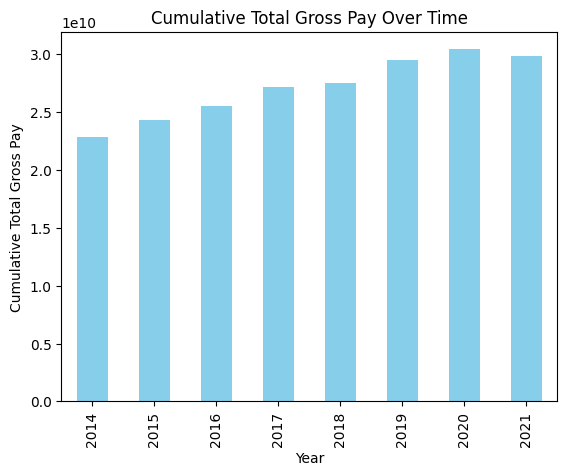

In [134]:
import matplotlib.pyplot as plt

# Grouping by 'Fiscal Year' and calculating the sum of 'Total Gross Pay' for each year
yearly_total_gross_pay = nyc.groupby('Fiscal Year')['Total Gross Paid'].sum()

# Plotting the data
yearly_total_gross_pay.plot(kind='bar', color='skyblue') \
                        .set(xlabel='Year', ylabel='Cumulative Total Gross Pay', title='Cumulative Total Gross Pay Over Time')
plt.show()


Cumulative gross pay has generally increased over time with 2020 fiscal year having the highest total gross pay. 

In [135]:
nyc['Fiscal Year'].unique()

array([2020, 2016, 2015, 2014, 2017, 2018, 2019, 2021])

Next, we'll examine how the total number of employees has changed for each fiscal year over time. This analysis will help us answer basic questions, such as whether the number of employees has generally increased or decreased over the years.

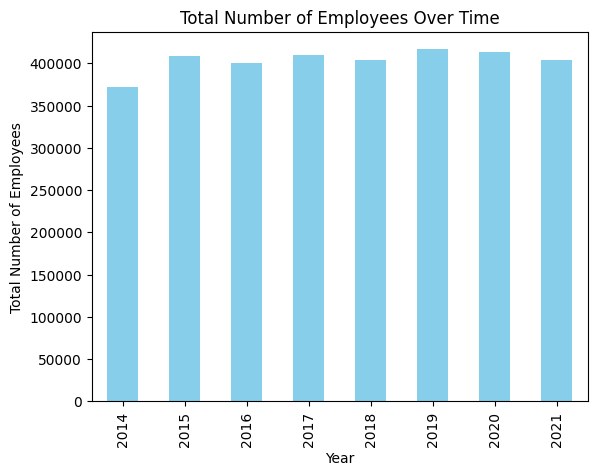

In [136]:
# look at number of employees over time
yearly_employee_count = nyc.groupby('Fiscal Year').apply(lambda x: x['First Name'].str.cat(x['Last Name'], sep=' ').nunique(), include_groups=False)


# Plotting the data
yearly_employee_count.plot(kind='bar', color='skyblue') \
                      .set(xlabel='Year', ylabel='Total Number of Employees', title='Total Number of Employees Over Time')
plt.show()

In [137]:
# Filter the original nyc DataFrame for each year and count the number of entries
yearly_entry_count = nyc['Fiscal Year'].value_counts().sort_index()
print(yearly_entry_count)

Fiscal Year
2014    509525
2015    577880
2016    544817
2017    562266
2018    546161
2019    592431
2020    590210
2021    573477
Name: count, dtype: int64


Let's calculate the percentage of individuals in 2021 who earned income on an annual, daily, and hourly basis.

In [138]:
# first we need to drop duplicate instances
nyc21_unique = nyc21.drop_duplicates()
nyc21_unique.shape

(573378, 18)

In [139]:
# Calculate the total number of individuals in 2021
total_individuals_2021 = len(nyc21_unique)

# Filter the DataFrame for each pay basis and count the number of individuals
counts = nyc21_unique['Pay Basis'].value_counts()
percentages = round((counts / total_individuals_2021) * 100,2)

# Create a new DataFrame to store the counts and percentages
pd.DataFrame({'Count': counts, 'Percentage': percentages})

,Count,Percentage
Pay Basis,,
PER ANNUM,343799,59.96
PER DAY,137830,24.04
PER HOUR,89896,15.68
PRORATED ANNUAL,1853,0.32


We'll create a pivot table using the median of total gross pay for 2021. The pivot table will have agency names as the index and will break down the data by pay basis category in the columns.

In [140]:
# Create a pivot table with median total gross pay
pivot_table = pd.pivot_table(nyc21, index='Agency Name', columns='Pay Basis', values='Total Gross Paid', aggfunc='median', margins=True)
pivot_table


Pay Basis,PER ANNUM,PER DAY,PER HOUR,PRORATED ANNUAL,All
Agency Name,,,,,
ADMIN FOR CHILDREN'S SVCS,65606.510,102861.90,29401.265,NaN,65585.300
ADMIN TRIALS AND HEARINGS,62942.665,75400.00,31752.580,NaN,45436.065
BOARD OF CORRECTION,70304.080,NaN,NaN,NaN,70304.080
BOARD OF ELECTION,65580.730,NaN,27731.880,NaN,57010.970
BOARD OF ELECTION POLL WORKERS,NaN,NaN,350.000,NaN,350.000
...,...,...,...,...,...
STATEN ISLAND COMMUNITY BD #3,66343.060,NaN,NaN,NaN,66343.060
TAX COMMISSION,110723.460,NaN,13322.340,25604.70,83971.025
TAXI & LIMOUSINE COMMISSION,58449.400,66931.63,42958.870,NaN,57260.310


Let's identify the top 10 positions (grouped by job titles) that had the highest median total gross pay in 2021.

In [141]:
nyc21.head(1)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Gross Paid
3923290,2021,996.0,NYC HOUSING AUTHORITY,MUSTACIUOLO,VITO,J,02/26/2018,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,258000.0,PER ANNUM,1820.0,257260.3,0.0,0.0,258000.0,515260.3


In [142]:
# find positions that pay the most
nyc21.groupby('Title Description')['Total Gross Paid'].median().sort_values(ascending=False).head(10)

Title Description
PENSION INVESTMENT ADVISOR                      349014.960
CHAIR                                           326110.630
CHIEF ACTUARY                                   305032.320
CAPTAIN DETAILED AS CHIEF OF TRAINING           297703.365
FIRST DEPUTY MAYOR                              284742.280
PRESIDENT                                       275457.880
DIRECTOR OF  INVESTMENTS                        264254.050
CAPTAIN DETAILED AS CHIEF OF RISK MANAGEMENT    254051.460
MAYOR                                           253064.890
CHANCELLOR                                      251872.840
Name: Total Gross Paid, dtype: float64

We'll determine the top 10 agencies with the highest total number of overtime hours for 2021.

In [143]:
# find top 10 agencies with most OT hours
nyc21.groupby('Agency Name')['OT Hours'].sum().sort_values(ascending=False).head(10)

Agency Name
POLICE DEPARTMENT                 10815884.93
FIRE DEPARTMENT                    8220712.59
DEPARTMENT OF SANITATION           4206474.56
DEPARTMENT OF CORRECTION           3323294.05
NYC HOUSING AUTHORITY              2686245.50
HRA/DEPT OF SOCIAL SERVICES        1276660.51
DEPARTMENT OF TRANSPORTATION       1074099.24
DEPT OF HEALTH/MENTAL HYGIENE       867652.73
DEPT OF ENVIRONMENT PROTECTION      679410.40
ADMIN FOR CHILDREN'S SVCS           539092.21
Name: OT Hours, dtype: float64

We'll use the `agg` function to accomplish this in one line of code. For the 2021 data, we'll group by the agency name and calculate the mean of the base salary, the median of the total overtime paid, and the standard deviation of the total gross paid. We'll save the result as an object that can be indexed later.

In [144]:
# Aggregation by Agency
agency_agg = nyc21.groupby('Agency Name').agg({'Base Salary':'mean', 'Total OT Paid':'median', 'Total Gross Paid':'std'})
agency_agg

,Base Salary,Total OT Paid,Total Gross Paid
Agency Name,,,
ADMIN FOR CHILDREN'S SVCS,68928.295008,21.95,32124.442208
ADMIN TRIALS AND HEARINGS,42774.316154,0.00,38677.473864
BOARD OF CORRECTION,94507.127586,0.00,41924.536647
BOARD OF ELECTION,41241.893459,13800.16,40142.716389
BOARD OF ELECTION POLL WORKERS,1.009790,0.00,2131.199265
...,...,...,...
STATEN ISLAND COMMUNITY BD #2,54442.350000,0.00,60292.117307
STATEN ISLAND COMMUNITY BD #3,76387.000000,0.00,23567.010355
TAX COMMISSION,88848.096129,0.00,51740.416321
